# Multisensory integration conceptual figures

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import os 
import glob

# For loading video and audio files 
import soundfile as sf 
import scipy.signal as ssignal
import skvideo.io as skvid 

FIG_DPI = 300
fig_folder = os.path.join('/home/timsit/msi-presentations/figures')

## Forms of mutlisensory integration

### single neuron tuning curves

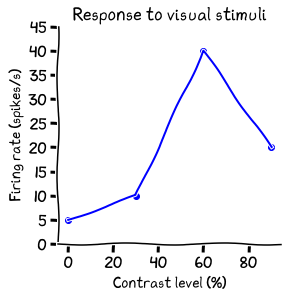

In [89]:


contrast_level = [0, 30, 60, 90]
response_to_contrast = [5, 10, 40, 20]

with plt.xkcd():
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    ax.scatter(contrast_level, response_to_contrast, color='blue')
    ax.plot(contrast_level, response_to_contrast, color='blue')

    ax.set_xlabel('Contrast level (%)')
    ax.set_ylabel('Firing rate (spikes/s)')

    ax.set_ylim([0, 45])

    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_title('Response to visual stimuli')

fig_ext = '.png'
fig_name = 'visual_response_identity'
fig.savefig(os.path.join(fig_folder, fig_name), dpi=FIG_DPI, bbox_inches="tight")

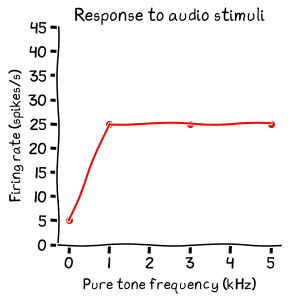

In [90]:
contrast_level = [0, 1, 3, 5]
response_to_contrast = [5, 25, 25, 25]

with plt.xkcd():
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    ax.scatter(contrast_level, response_to_contrast, color='red')
    ax.plot(contrast_level, response_to_contrast, color='red')

    ax.set_xlabel('Pure tone frequency (kHz)')
    ax.set_ylabel('Firing rate (spikes/s)')

    ax.set_ylim([0, 45])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_title('Response to audio stimuli')

fig_ext = '.png'
fig_name = 'audio_response_presense'
fig.savefig(os.path.join(fig_folder, fig_name + fig_ext), dpi=FIG_DPI, bbox_inches="tight")

### Linear response

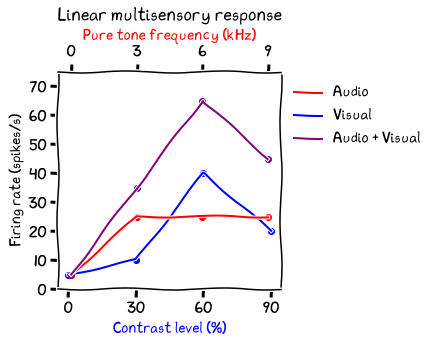

In [91]:
baseline_firing_rate = 5

contrast_level = [0, 30, 60, 90]
response_to_contrast = np.array([baseline_firing_rate, 10, 40, 20])

with plt.xkcd():
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    ax.scatter(contrast_level, response_to_contrast, color='blue')
    vis_line = ax.plot(contrast_level, response_to_contrast, color='blue',
           label='Visual')

    ax.xaxis.label.set_color('blue')
    ax.set_xticks([0, 30, 60, 90])

    audio_freq = [0, 3, 6, 9]
    response_to_audio = np.array([baseline_firing_rate, 25, 25, 25])

    ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
    ax2.scatter(audio_freq, response_to_audio, color='red')
    aud_line = ax2.plot(audio_freq, response_to_audio, color='red',
           label='Audio')


    ax2.set_xlabel('Pure tone frequency (kHz)')
    ax2.xaxis.label.set_color('red')
    ax2.set_xticks([0, 3, 6, 9])

    ax.set_xlabel('Contrast level (%)')
    ax.set_ylabel('Firing rate (spikes/s)')


    # Audio + Visual response 
    audio_video_response = response_to_audio + response_to_contrast
    audio_video_response[0] = baseline_firing_rate
    ax2.scatter(audio_freq, audio_video_response, 
                color='purple')
    aud_vis_line = ax2.plot(audio_freq, audio_video_response, 
             color='purple',
           label='Audio + Visual')

    # From: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
    # added these three lines
    lns = aud_line + vis_line + aud_vis_line
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0, bbox_to_anchor=(1.18, 0.5, 0.5, 0.5),
             frameon=False)

    ax.set_ylim([0, 75])

    ax.set_title('Linear multisensory response')
    
fig_ext = '.png'
fig_name = 'linear_multimodal_response'
fig.savefig(os.path.join(fig_folder, fig_name + fig_ext), dpi=FIG_DPI, bbox_inches="tight")

### Nonlinear repsonse

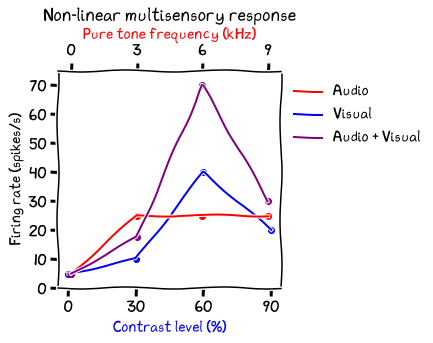

In [92]:
baseline_firing_rate = 5

contrast_level = [0, 30, 60, 90]
response_to_contrast = np.array([baseline_firing_rate, 10, 40, 20])

with plt.xkcd():
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    ax.scatter(contrast_level, response_to_contrast, color='blue')
    vis_line = ax.plot(contrast_level, response_to_contrast, color='blue',
           label='Visual')

    ax.xaxis.label.set_color('blue')
    ax.set_xticks([0, 30, 60, 90])

    audio_freq = [0, 3, 6, 9]
    response_to_audio = np.array([baseline_firing_rate, 25, 25, 25])

    ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
    ax2.scatter(audio_freq, response_to_audio, color='red')
    aud_line = ax2.plot(audio_freq, response_to_audio, color='red',
           label='Audio')


    ax2.set_xlabel('Pure tone frequency (kHz)')
    ax2.xaxis.label.set_color('red')
    ax2.set_xticks([0, 3, 6, 9])

    ax.set_xlabel('Contrast level (%)')
    ax.set_ylabel('Firing rate (spikes/s)')


    # Audio + Visual response 
    audio_video_response = [baseline_firing_rate, 17.5, 70, 30]
    ax2.scatter(audio_freq, audio_video_response, 
                color='purple')
    aud_vis_line = ax2.plot(audio_freq, audio_video_response, 
             color='purple',
           label='Audio + Visual')

    # From: https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
    # added these three lines
    lns = aud_line + vis_line + aud_vis_line
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=0, bbox_to_anchor=(1.18, 0.5, 0.5, 0.5),
             frameon=False)

    ax.set_ylim([0, 75])

    ax.set_title('Non-linear multisensory response',
                y=1.2)

fig_ext = '.png'
fig_name = 'nonlinear_multimodal_response'
fig.savefig(os.path.join(fig_folder, fig_name + fig_ext), dpi=FIG_DPI, bbox_inches="tight")

### Population mixed selectivity for audio and visual

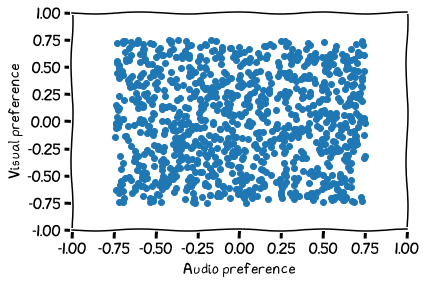

In [7]:
# WIP: need to set x and y axis lines 
with plt.xkcd():
    fig, ax = plt.subplots()
    num_neurons = 1000
    audio_preference_index = np.random.uniform(-0.75, 0.75, size=num_neurons)
    video_preference_index = np.random.uniform(-0.75, 0.75, size=num_neurons)

    ax.scatter(audio_preference_index, video_preference_index)

    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

    ax.set_xlabel('Audio preference')
    ax.set_ylabel('Visual preference')

## Where to find multisensory neurons?

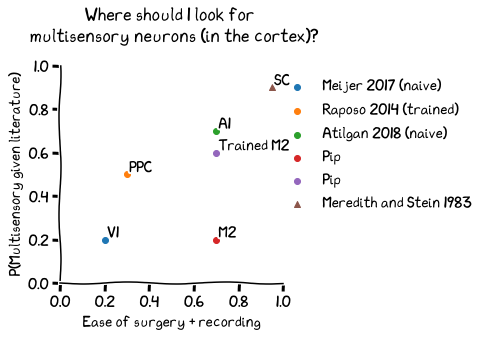

In [93]:
with plt.xkcd():
    fig, ax = plt.subplots()

    fig.set_size_inches(4, 4)

    brain_regions = {
        'V1': [0.2, 0.2],
        'PPC': [0.3, 0.5],
        'A1': [0.7, 0.7],
        'M2': [0.7, 0.2],
        'Trained M2': [0.7, 0.6],
        'SC': [0.95, 0.9]
    }

    literature = {
        'V1': 'Meijer 2017 (naive)',
        'PPC': 'Raposo 2014 (trained)',
        'A1': 'Atilgan 2018 (naive)',
        'M2': 'Pip', 
        'Trained M2': 'Pip',
        'SC': 'Meredith and Stein 1983'
    }


    for brain_region, metric in brain_regions.items():

        if brain_region == 'SC':
            ax.scatter(metric[0], metric[1], label=literature[brain_region],
                      marker='^')
            ax.annotate(brain_region, (metric[0] + 0.01, metric[1] + 0.01))

        else: 
            ax.scatter(metric[0], metric[1], label=literature[brain_region])
            ax.annotate(brain_region, (metric[0] + 0.01, metric[1] + 0.01))




    ax.set_xlabel('Ease of surgery + recording')
    ax.set_ylabel('P(Multisensory given literature)')


    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    ax.legend(bbox_to_anchor=(1.4, 0.5, 0.5, 0.5), frameon=False)

    ax.set_title('Where should I look for \n multisensory neurons (in the cortex)?',
                 y=1.08)


    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

fig_ext = '.png'
fig_name = 'where_to_find_multimodal_response'
fig.savefig(os.path.join(fig_folder, fig_name + fig_ext), dpi=FIG_DPI, bbox_inches="tight")

## High dimensional audio-video response

# Filmworld

In [15]:
num_cycle = 6 
num_points_per_cycle = 201

x = np.linspace(-np.pi * num_cycle, np.pi * num_cycle, num_points_per_cycle * num_cycle)
sin_x = np.sin(x)

num_y_pixel = num_points_per_cycle * num_cycle
sin_x_2D = np.tile(sin_x, (num_y_pixel, 1))

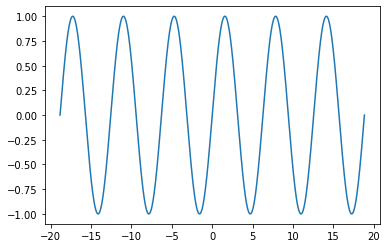

In [16]:
fig, ax = plt.subplots()
ax.plot(x, sin_x)

[]

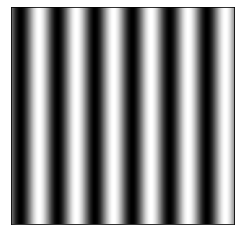

In [25]:
fig, ax1 = plt.subplots()
fig.set_size_inches(4, 4)
im = ax1.imshow(sin_x_2D, aspect='auto', cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])

### Grating / Pure tone world

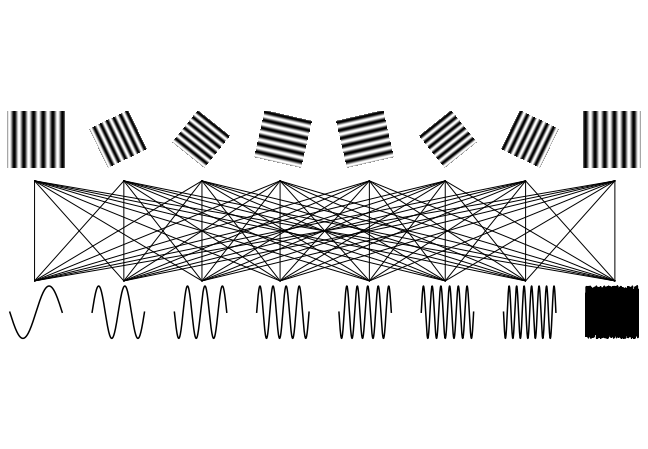

In [111]:
from scipy import ndimage
from matplotlib.patches import ConnectionPatch
import itertools
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

num_frequency = 8
num_orientations = 8

x_loc_list = np.linspace(0, 1, num_orientations)
degree_list = np.linspace(0, 180, num_orientations)
sound_frequency_list = np.arange(1, num_orientations) * 1000
num_cycle_list = np.arange(1, num_orientations)

grating_width = 0.1
grating_height = 0.1

for x_loc, degree in zip(x_loc_list, degree_list):
    
    grating_1 = fig.add_axes([x_loc, 0.6, grating_width, grating_height])
    grating_1.imshow(ndimage.rotate(sin_x_2D, degree, cval=1), aspect='auto', cmap='gray')
    grating_1.axis('off')

    # grating_1 = fig.add_axes([0.2, 0.5, 0.15, 0.15])
    # grating_1.imshow(sin_x_2D, aspect='auto', cmap='gray')
    # grating_1.axis('off')
    
    
for x_loc, num_cycle in zip(x_loc_list, num_cycle_list):
    
    sound_freq = fig.add_axes([x_loc, 0.3, grating_width, grating_height])
    
    x = np.linspace(-np.pi * num_cycle, np.pi * num_cycle, num_points_per_cycle * num_cycle)
    sin_x = np.sin(x)
    sound_freq.plot(x, sin_x, color='black')
    sound_freq.axis('off')


# add white noise to the end 

white_noise = fig.add_axes([x_loc_list[-1], 0.3, grating_width, grating_height])
white_noise.plot(x, np.random.rand(len(x)), color='black')
white_noise.axis('off')


# connect subplots 
line_y_start = 0.6
line_y_end = 0.37

cp_list = list()

x_loc_list_custom_list = [-0.1, 0.1, 0.275, 0.45, 0.65, 0.82, 1, 1.2]

for line_x_start, line_x_end in itertools.product(x_loc_list_custom_list, x_loc_list_custom_list):

    cp1 = ConnectionPatch((line_x_start, line_y_end), (line_x_end, line_y_start), "axes fraction", "axes fraction",
                      axesA=ax, axesB=ax)

    cp_list.append(cp1)

for cp in cp_list:
    ax.add_artist(cp)

# ax.set_xlim([-0.5, 2.5])

hide_main_axis = True
# Turn off main axis 

if hide_main_axis:
    ax.axis('off')

fig_name = 'orientation_pure_tone_combinations.png'
fig_folder = os.path.join('/home/timsit/msi-presentations/figures')
fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight')

### Actual filmworld

In [108]:
# load example videos 
media_folder = '/home/timsit/Dropbox/tempData/3000_audioset/3000_plus_500/'
example_youtube_ids = ['0YE7RAvC0Mk', 'f0Rm0x73oD4', 'AFy5nUBTPlc', 
                       'ndqvjU1KJYY', 'eGaEKulYvh8', 'TIGxinVAAWw',
                      '0_DblE2DCfg', '3SGfCP-HFt4']

audio_file_list = list()
video_file_list = list()

for youtube_id in example_youtube_ids:
    
    audio_file_path = glob.glob(os.path.join(media_folder, 'audio', '*' + youtube_id + '*'))[0]
    video_file_path = glob.glob(os.path.join(media_folder, 'video', '*' + youtube_id + '*'))[0]
    
    audio_file_list.append(sf.read(audio_file_path))
    video_file_list.append(skvid.vread(video_file_path))

/home/timsit/multisensory-integration/src/visualization/vizaudio.py:22: RuntimeWarning: divide by zero encountered in log
  plot_obj = ax.pcolormesh(time, frequency, np.log(power))


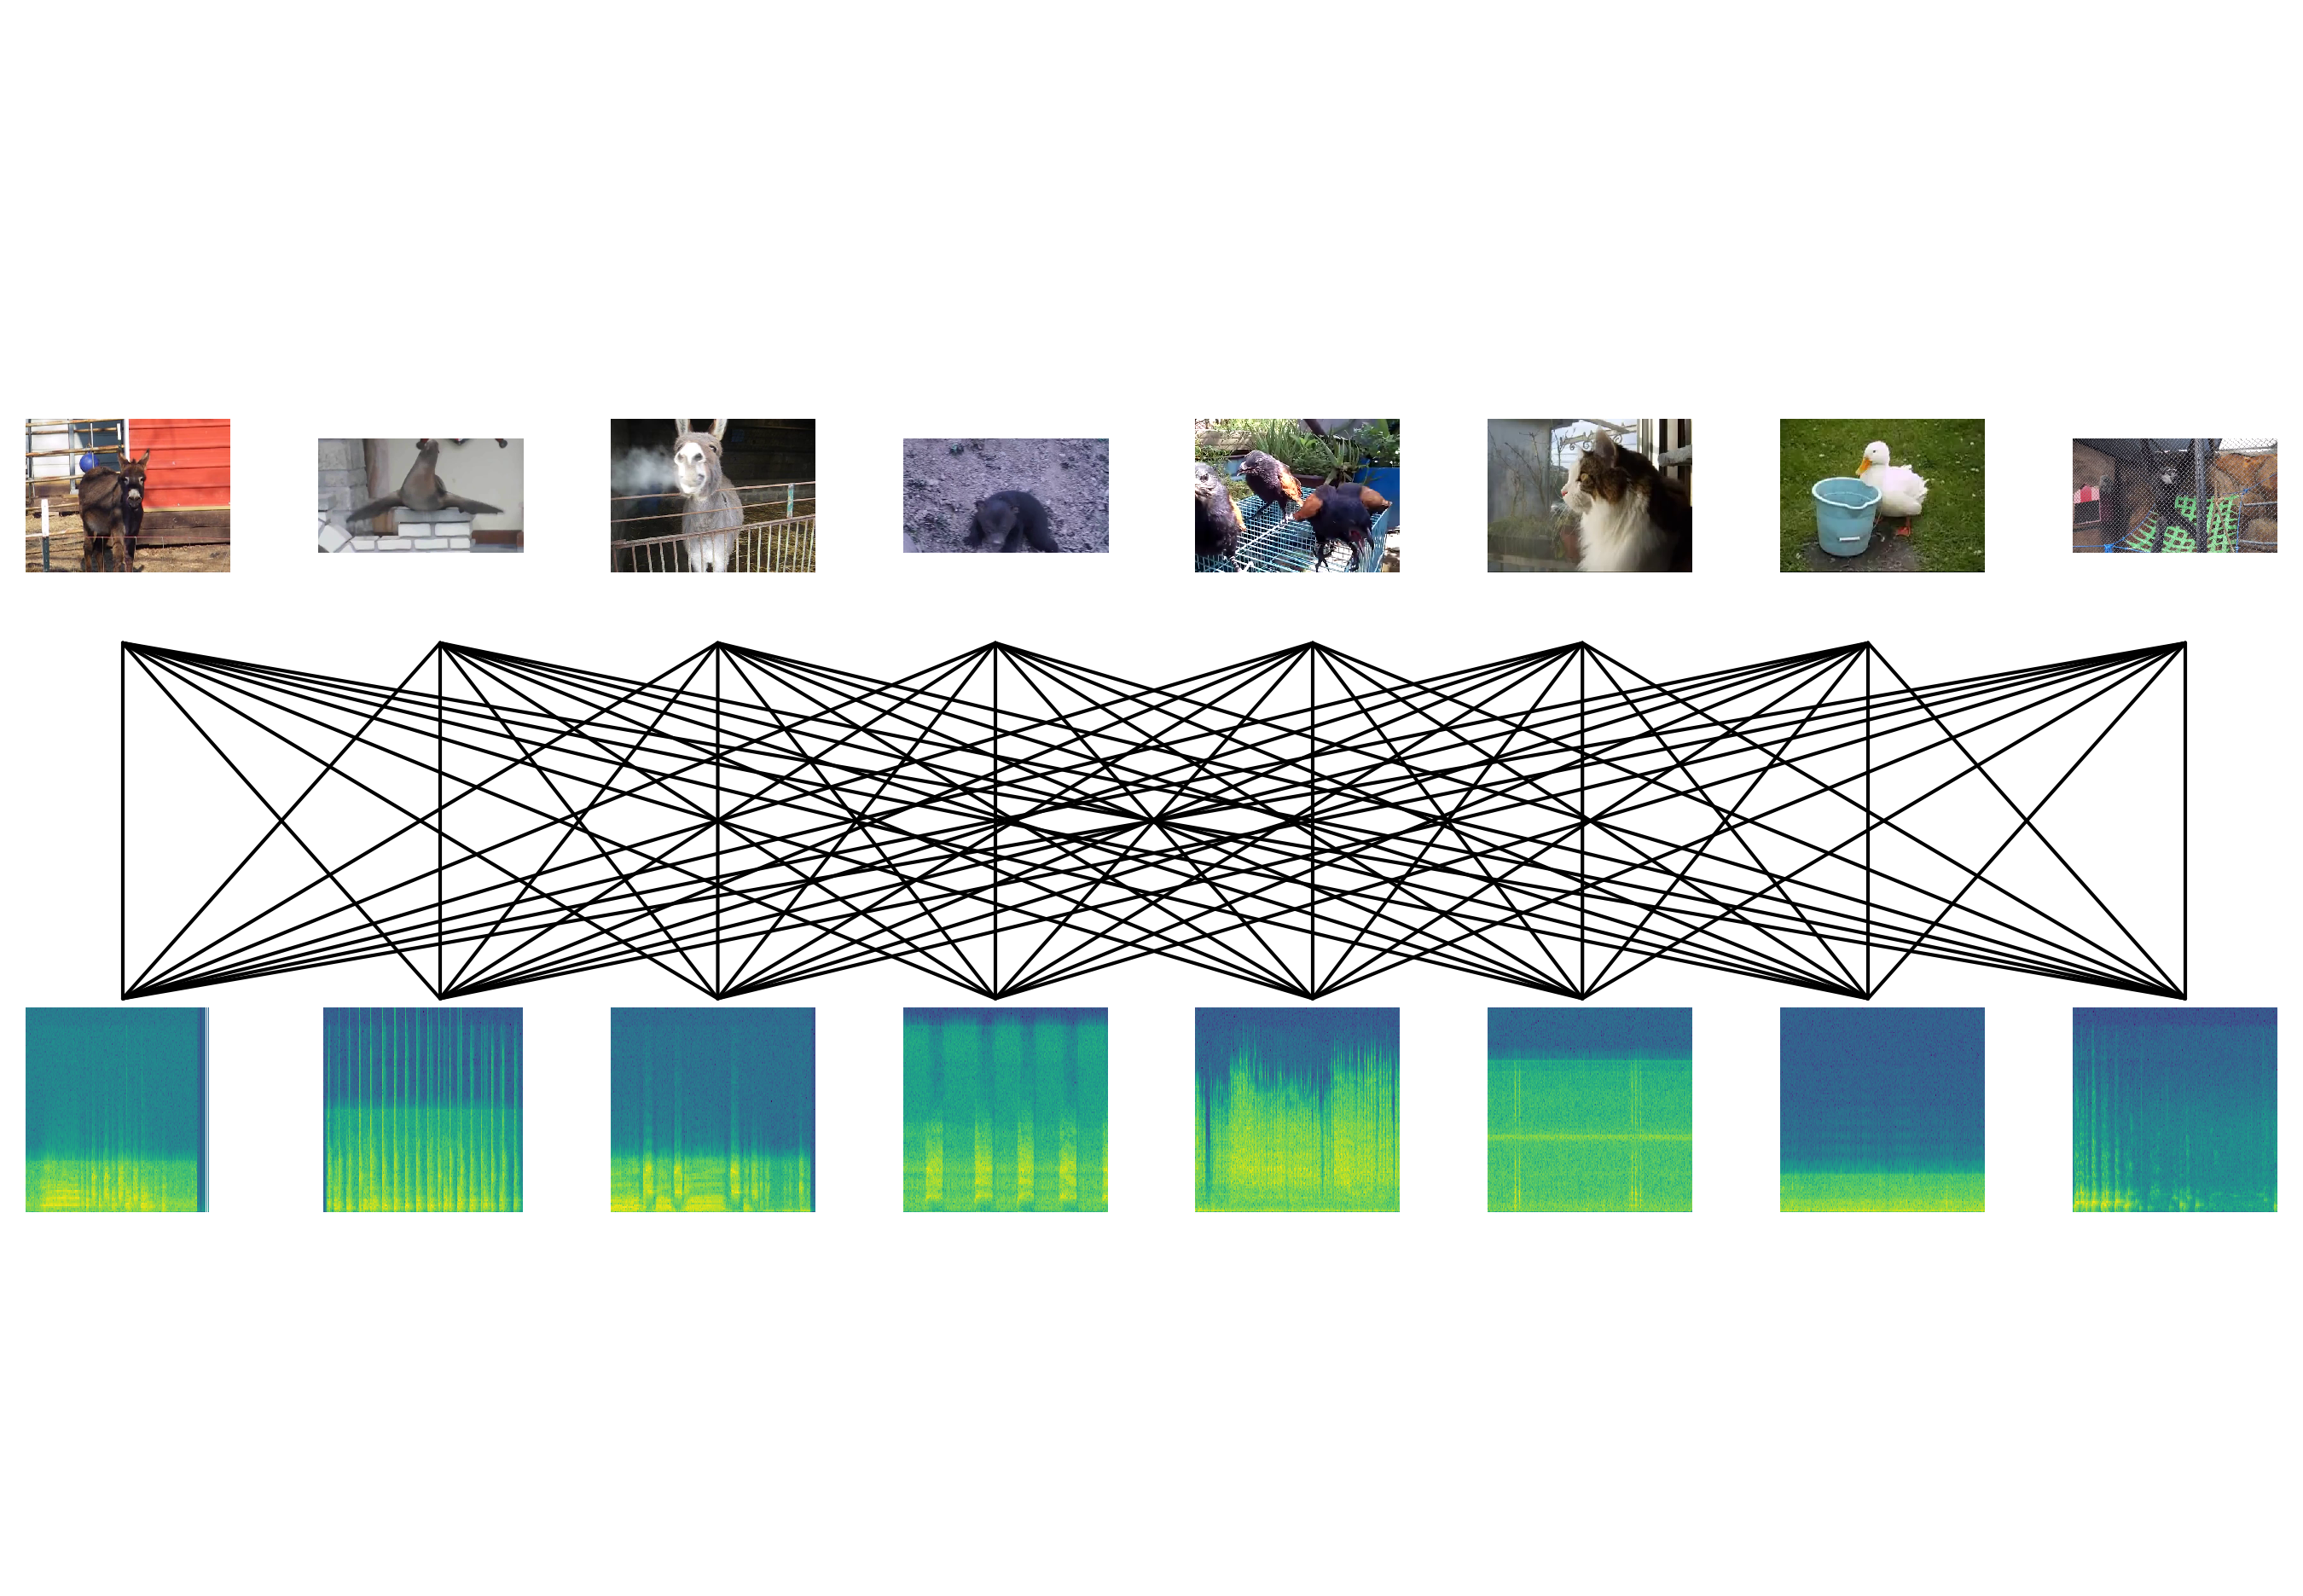

In [118]:
from scipy import ndimage
from matplotlib.patches import ConnectionPatch
import itertools
import src.data.process_vid as pvid 
import src.data.process_sound as psound
import src.data.filmworld as filmworld
from src.visualization import vizaudio
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

num_video = len(video_file_list)
num_audio = len(audio_file_list)
channel_idx = 0

x_loc_list = np.linspace(0, 1, num_video)


num_cycle_list = np.arange(1, num_video)

image_width = 0.1
image_height = 0.1

for x_loc, video_data in zip(x_loc_list, video_file_list):
    
    image_1 = fig.add_axes([x_loc, 0.6, image_width, image_height])
    # grating_1.imshow(ndimage.rotate(sin_x_2D, degree, cval=1), aspect='auto', cmap='gray')
    image_1.imshow(video_data[0, :, :, :])
    image_1.axis('off')

    # grating_1 = fig.add_axes([0.2, 0.5, 0.15, 0.15])
    # grating_1.imshow(sin_x_2D, aspect='auto', cmap='gray')
    # grating_1.axis('off')
    
    
for x_loc, audio_data in zip(x_loc_list, audio_file_list):
    
    sound_freq = fig.add_axes([x_loc, 0.3, image_width, image_height])
    
    # x = np.linspace(-np.pi * num_cycle, np.pi * num_cycle, num_points_per_cycle * num_cycle)
    # sin_x = np.sin(x)
    # sound_freq.plot(x, sin_x, color='black')
    # sound_freq.axis('off')
    audio_sample_rate = audio_data[1]
    f, t, Sxx = ssignal.spectrogram(audio_data[0][:, channel_idx], audio_sample_rate)
    fig, sound_freq = vizaudio.plot_spectrogram(fig=fig, ax=sound_freq, 
                                                  time=t, frequency=f, power=Sxx,
                                                   include_colorbar=False)

    sound_freq.axis('off')
    
# add white noise to the end 

# white_noise = fig.add_axes([x_loc_list[-1], 0.3, grating_width, grating_height])
# white_noise.plot(x, np.random.rand(len(x)), color='black')
# white_noise.axis('off')


# connect subplots 
line_y_start = 0.6
line_y_end = 0.37

cp_list = list()

x_loc_list_custom_list = [-0.1, 0.1, 0.275, 0.45, 0.65, 0.82, 1, 1.2]

for line_x_start, line_x_end in itertools.product(x_loc_list_custom_list, x_loc_list_custom_list):

    cp1 = ConnectionPatch((line_x_start, line_y_end), (line_x_end, line_y_start), "axes fraction", "axes fraction",
                      axesA=ax, axesB=ax)

    cp_list.append(cp1)

for cp in cp_list:
    ax.add_artist(cp)

# ax.set_xlim([-0.5, 2.5])

hide_main_axis = True
# Turn off main axis 

if hide_main_axis:
    ax.axis('off')

    
ax.set_ylim([0.3, 1.5])

# TODO: check this for doing cropping 
# https://stackoverflow.com/questions/8971834/matplotlib-savefig-with-a-legend-outside-the-plot?lq=1


fig_name = 'filmworld_all_combinations.png'
fig_folder = os.path.join('/home/timsit/msi-presentations/figures')
fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, 
            bbox_inches='tight', pad_inches=0)

## Plot all the images of the videos

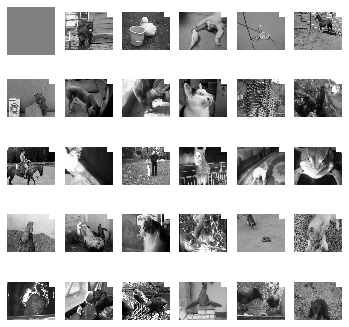

In [72]:
video_folder = '/home/timsit/Dropbox/tempData/filmworld/filmWorldwGaps/processed-merged-30-cont-w-corner-150/'
video_num_list = np.arange(0, 30)

fig, ax = plt.subplots(5, 6)
fig.set_size_inches(6, 6)

for video_num in video_num_list:
    
    video_array = skvid.vread(os.path.join(video_folder, 'video-' + str(video_num) + '-audio-0.mp4'))
    
    ax.flatten()[video_num].imshow(video_array[0, :, :, :])
    ax.flatten()[video_num].axis('off')

fig_name = 'filmworld_all_videos'
fig_ext = '.png'
fig.savefig(os.path.join(fig_folder, fig_name + fig_ext), dpi=300)

#### Filmworld presentation scheme

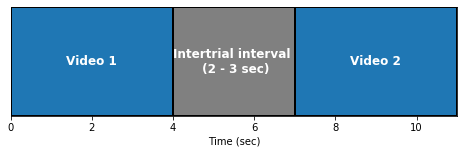

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 2)
ax.set_xlim([0, 11])
ax.set_xlabel('Time (sec)')

video_duration = 4
max_inter_trial_duration = 3


blocks = {'Video 1': mpl.patches.Rectangle((0, 0), video_duration, 1,
                                          edgecolor='black', lw=2),
         'Intertrial interval \n (2 - 3 sec)': mpl.patches.Rectangle((4, 0),
                                max_inter_trial_duration, 1, edgecolor='black', 
                                facecolor='gray', lw=2),
         'Video 2': mpl.patches.Rectangle((7, 0), video_duration, 1, edgecolor='black', lw=2)}


for r in blocks:
    ax.add_artist(blocks[r])
    rx, ry = blocks[r].get_xy()
    cx = rx + blocks[r].get_width()/2.0
    cy = ry + blocks[r].get_height()/2.0

    ax.annotate(r, (cx, cy), color='w', weight='bold', 
                fontsize=12, ha='center', va='center')

ax.set_yticks([])


fig_name = 'filmworld_trial_structure'
fig_ext = '.png'
fig.savefig(os.path.join(fig_folder, fig_name + fig_ext), dpi=FIG_DPI, bbox_inches="tight")

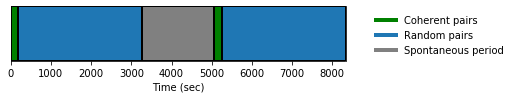

In [95]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 1)

num_video = 32
video_duration = 6
spontaneous_period_duration = 30 * 60

first_coherent_end = 0 + num_video * video_duration
random_pair_duration = num_video * num_video / 2 * video_duration
first_random_pair_end = first_coherent_end + random_pair_duration
spontaneous_period_end = first_random_pair_end + spontaneous_period_duration
second_coherent_end = spontaneous_period_end + num_video * video_duration
second_random_pair_end = second_coherent_end + random_pair_duration

blocks = {'Coherent': mpl.patches.Rectangle((0, 0), num_video * video_duration, 1,
                                          edgecolor='black', lw=2, facecolor='green'),
         'Random pairs': mpl.patches.Rectangle((first_coherent_end, 0), random_pair_duration, 1,
                                          edgecolor='black', lw=2),
         'Spontaneous period': mpl.patches.Rectangle((first_random_pair_end, 0), spontaneous_period_duration, 1,
                            edgecolor='black', lw=2, facecolor='grey'),
          'Coherent repeat': mpl.patches.Rectangle((spontaneous_period_end, 0), num_video * video_duration, 1,
                                          edgecolor='black', lw=2, facecolor='green'),
          'Random pairs repeat': mpl.patches.Rectangle((second_coherent_end, 0), random_pair_duration, 1,
                            edgecolor='black', lw=2),
         }

for r in blocks:
    ax.add_artist(blocks[r])
    """
    rx, ry = blocks[r].get_xy()
    cx = rx + blocks[r].get_width()/2.0
    cy = ry + blocks[r].get_height()/2.0

    ax.annotate(r, (cx, cy), color='w', weight='bold', 
                fontsize=12, ha='center', va='center')
    """
    
custom_lines = [mpl.lines.Line2D([0], [0], color='Green', lw=4),
                mpl.lines.Line2D([0], [0], color='#1f77b4', lw=4),
                mpl.lines.Line2D([0], [0], color='Gray', lw=4)]

ax.legend(custom_lines, ['Coherent pairs', 
                         'Random pairs', 'Spontaneous period'], 
          bbox_to_anchor=(1., 0.5, 0.5, 0.5),
          frameon=False)

ax.set_yticks([])
ax.set_xlim([0, second_random_pair_end])
ax.set_xlabel('Time (sec)')

fig_name = 'filmworld_experiment_overview_structure'
fig_ext = '.png'
fig.savefig(os.path.join(fig_folder, fig_name + fig_ext), dpi=FIG_DPI, bbox_inches="tight")

# Correlation analysis conceptual figures

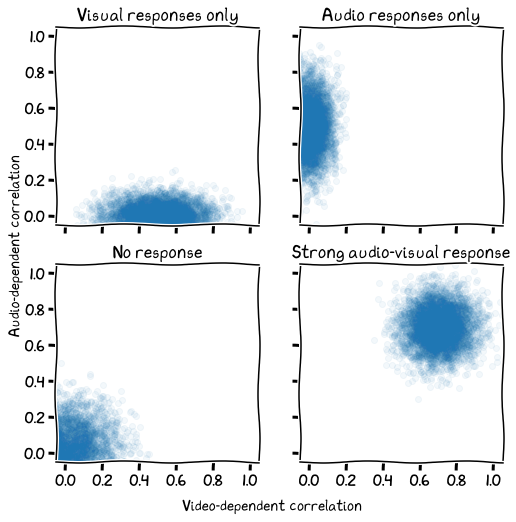

In [67]:
with plt.xkcd():
    fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
    
    num_neurons = 5000
    fig.set_size_inches(8, 8)

    vis_only_aud_vis_correlation = np.random.multivariate_normal(mean=[0.5, 0.0], 
                                                        cov = [[0.02, 0], [0, 0.004]],
                                                       size=num_neurons)
    
    aud_only_aud_vis_correlation = np.random.multivariate_normal(mean=[0.0, 0.5], 
                                                        cov = [[0.004, 0], [0, 0.02]],
                                                       size=num_neurons)
    
    no_response_aud_vis_correlation = np.random.multivariate_normal(mean=[0.0, 0.0], 
                                                        cov = [[0.02, 0], [0, 0.02]],
                                                       size=num_neurons)
    
    multimodal_aud_vis_correlation = np.random.multivariate_normal(mean=[0.7, 0.7], 
                                                        cov = [[0.01, 0], [0, 0.01]],
                                                       size=num_neurons)
    
    ax[0, 0].set_title('Visual responses only')
    ax[0, 1].set_title('Audio responses only')
    
    ax[1, 0].set_title('No response')
    ax[1, 1].set_title('Strong audio-visual response')
    
    
    ax[0, 0].set_xlim([-0.05, 1.05])
    ax[0, 0].set_ylim([-0.05, 1.05])

    ax[0, 0].scatter(vis_only_aud_vis_correlation[:, 0], vis_only_aud_vis_correlation[:, 1], alpha=0.05)
    ax[0, 1].scatter(aud_only_aud_vis_correlation[:, 0], aud_only_aud_vis_correlation[:, 1], alpha=0.05)
    
    ax[1, 0].scatter(no_response_aud_vis_correlation[:, 0], no_response_aud_vis_correlation[:, 1], alpha=0.05)
    ax[1, 1].scatter(multimodal_aud_vis_correlation[:, 0], multimodal_aud_vis_correlation[:, 1], alpha=0.05)
    
    
    fig.text(0.5, 0.04, 'Video-dependent correlation', ha='center')
    fig.text(0.04, 0.5, 'Audio-dependent correlation', va='center', rotation='vertical')
    

    fig_name = 'correlation_conceptual_figure_4_conditions'
    fig_ext = '.png'
    fig.savefig(os.path.join(fig_folder, fig_name + fig_ext), dpi=300)

In [5]:
adu_vis_correlation

array([[ 2.16343943,  1.69926708],
       [ 1.97909945,  2.56783435],
       [-0.37182322, -0.17188322],
       [ 0.57427586, -0.08516731],
       [ 0.11844582, -0.63103912],
       [ 1.03791942, -0.90441708],
       [ 1.19728052,  1.10291786],
       [-0.21715532, -1.06605705],
       [ 2.19911291,  0.41567892],
       [ 0.22814566, -0.31374096],
       [ 0.69970339, -0.08846106],
       [ 0.73354977,  0.47796735],
       [-0.0050757 , -2.12783234],
       [ 0.63219825,  0.4957808 ],
       [ 0.55107103, -1.97602012],
       [-0.21231644, -0.20511349],
       [ 0.64844882,  0.63033398],
       [ 0.73841365,  1.42507585],
       [ 2.19027872,  0.23861702],
       [-0.27461471,  0.27038468],
       [-0.56783892,  0.31003675],
       [ 2.87534401, -0.38947503],
       [ 2.40571714,  2.90875496],
       [ 2.37005339, -0.38074845],
       [ 0.15697542,  0.2015068 ],
       [-0.34152164, -0.47901315],
       [ 0.21973575,  0.17089449],
       [ 2.2161822 , -0.24484412],
       [ 0.01389917,